In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/jyots/Desktop/DS_Projects/airbnb_DataSets/Paris_dfmguest.csv',
                   encoding='utf8')

In [3]:
df.head(2)

,Unnamed: 0,bathrooms,bedrooms,bhk,dist_arprt,host_count,latitude,longitude,metrostn_count,minstay,neighborhood,overall_satisfaction,price,rest_count,review_count,reviews,room_id,room_type
0,0,1.0,1.0,1.0,0.19109,478,48.888048,2.391798,6,2.0,Amerique,5.0,93.0,1,3682,7,1590108,Entire home/apt
1,1,1.0,1.0,1.0,0.19109,478,48.887168,2.393196,6,2.0,Amerique,4.5,73.0,1,3682,31,599113,Entire home/apt


In [4]:
df.drop(['Unnamed: 0'], inplace=True, axis=1)

In [5]:
cols_paris = df.columns.tolist()
cols_paris = cols_paris[:13] + [cols_paris[-3]]+ [cols_paris[-4]] + [cols_paris[-2]] + cols_paris[-1:]
df = df[cols_paris]

In [6]:
df.head(2)

,bathrooms,bedrooms,bhk,dist_arprt,host_count,latitude,longitude,metrostn_count,minstay,neighborhood,overall_satisfaction,price,rest_count,reviews,review_count,room_id,room_type
0,1.0,1.0,1.0,0.19109,478,48.888048,2.391798,6,2.0,Amerique,5.0,93.0,1,7,3682,1590108,Entire home/apt
1,1.0,1.0,1.0,0.19109,478,48.887168,2.393196,6,2.0,Amerique,4.5,73.0,1,31,3682,599113,Entire home/apt


In [7]:
df.shape

(41192, 17)

In [8]:
df.to_csv(path_or_buf='/Users/jyots/Desktop/DS_Projects/airbnb_datasets/Paris_IP.csv')

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV, ElasticNet, LassoCV, Lasso

import patsy

In [10]:
df = df[df.price <= 1000]


In [11]:
df.shape

(41124, 17)

In [12]:
X = df[[x for x in df.columns if x not in ['bhk','price','latitude','longitude','room_id']]]
y = df.price.values
target = np.log(y)


In [13]:
X.shape

(41124, 12)

In [14]:
formula = "target ~ "+' + '.join(X)+' -1'
formula

u'target ~ bathrooms + bedrooms + dist_arprt + host_count + metrostn_count + minstay + neighborhood + overall_satisfaction + rest_count + reviews + review_count + room_type -1'

In [15]:
y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')
y = y.values.ravel()

In [16]:
y

array([ 4.53259949,  4.29045944,  3.91202301, ...,  4.61512052,
        6.10479323,  4.49980967])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [18]:
X_train.shape, X_test.shape

((28786, 92), (12338, 92))

In [19]:
X_test.head(2)

,neighborhood[Amerique],neighborhood[Archives],neighborhood[Arsenal],neighborhood[Arts-et-Metiers],neighborhood[Auteuil],neighborhood[Batignolles],neighborhood[Bel-Air],neighborhood[Belleville],neighborhood[Bercy],neighborhood[Bonne-Nouvelle],...,bathrooms,bedrooms,dist_arprt,host_count,metrostn_count,minstay,overall_satisfaction,rest_count,reviews,review_count
40694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.203624,646.0,5.0,1.0,4.5,1.0,14.0,5960.0
11263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,0.237016,378.0,3.0,2.0,5.0,9.0,7.0,4854.0


In [20]:
linmod = LinearRegression()

In [21]:
scores = cross_val_score(linmod, X_train, y_train, cv = 10)
print scores
print np.mean(scores)
print np.std(scores)

[ 0.60284789  0.58756445  0.57867038  0.60234394  0.58452451  0.58218571
  0.56851781  0.60068798  0.5788715   0.59158945]
0.587780361017
0.0109343335316


In [22]:
predictions = cross_val_predict(linmod, X_test, y_test, cv = 10) 
accuracy = metrics.r2_score(y_test, predictions)
print accuracy


0.58758302844


In [23]:
residuals = y_test - predictions
residuals

array([ 0.15827764,  0.49484899, -0.03103523, ...,  0.09137507,
       -0.16992789, -0.05359958])

In [24]:
np.mean(predictions)


4.576788249601015

In [25]:
linmod.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
linmod.score(X_test, y_test)

0.59162813589847918

In [27]:
#linmod.coef_

In [28]:
print np.mean(y_train), np.mean(y_test)

4.57810857121 4.57725692897


In [29]:
# Regularization: Gridsearch an optimal ElasticNet regression

In [30]:
Xn = StandardScaler().fit_transform(X)

In [31]:
Xn_train, Xn_test, y_train, y_test = train_test_split(Xn, y, test_size = 0.3)

In [32]:
# enet_cv = ElasticNetCV(l1_ratio=np.linspace(0.01, 1., 50), n_alphas=300, cv=10, verbose=1,max_iter= 1500)
# enet_cv.fit(Xn_train, y_train)


In [33]:
# print enet_cv.l1_ratio_
# print enet_cv.alpha_

In [34]:
alpha = 0.00113584928922
l1_ratio = 0.272653061224


enet_paris = ElasticNet(alpha= alpha, l1_ratio=l1_ratio)

y_pred_enet = enet_paris.fit(Xn_train, y_train).predict(Xn_test)
r2_score_enet = metrics.r2_score(y_test, y_pred_enet)
print(enet_paris)
print("r^2 on test data : %f" % r2_score_enet)


ElasticNet(alpha=0.00113584928922, copy_X=True, fit_intercept=True,
      l1_ratio=0.272653061224, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.594041


/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [35]:
from sklearn.externals import joblib
#joblib.dump(enet_paris, '/Users/jyots/Desktop/DS_Projects/Models/enet_Paris.pkl') 

In [36]:
lassocv = LassoCV(n_alphas=300, cv=10)

In [37]:
lassocv.fit(Xn_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=300, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [38]:
lassocv.alpha_

0.00038626953301557331

In [39]:
lasso = Lasso(alpha=lassocv.alpha_)
lasso_model = lasso.fit(Xn_train, y_train)
y_pred_lasso = lasso_model.predict(Xn_test)
r2_score_lasso = metrics.r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)


Lasso(alpha=0.00038626953301557331, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.594038


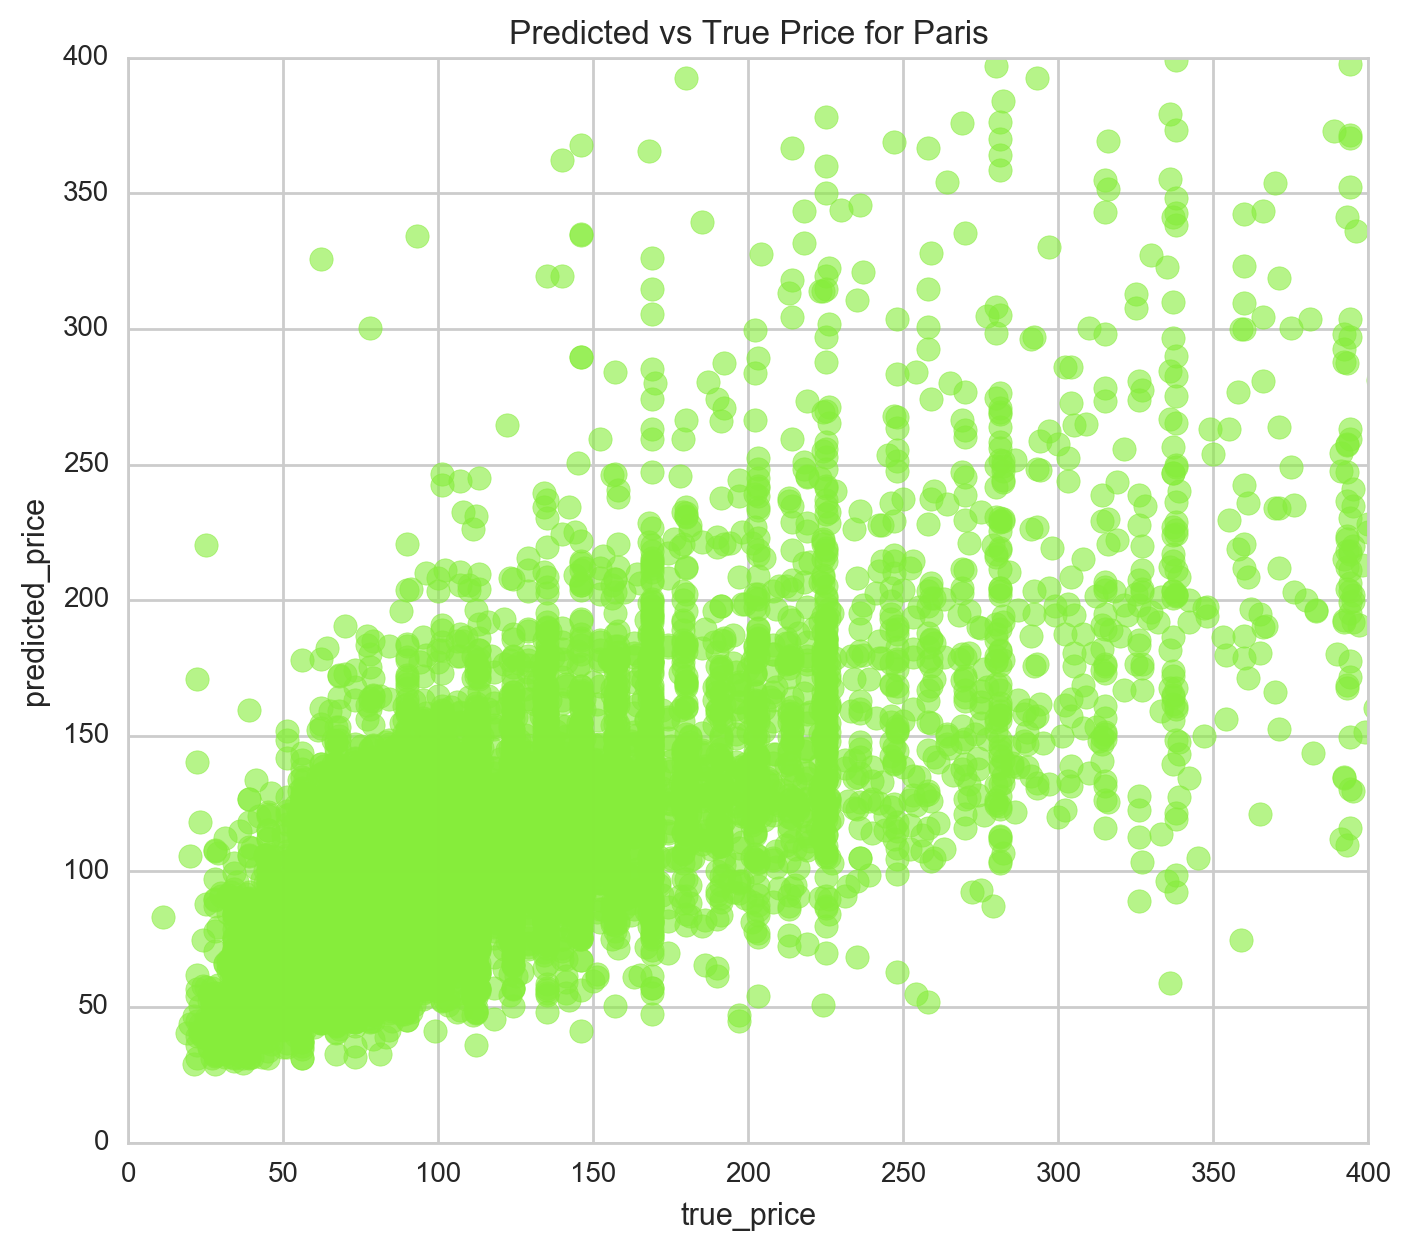

In [40]:
fig, ax = plt.subplots(figsize=(8,7))

ax.scatter(np.exp(y_test), np.exp(y_pred_enet), s=70, alpha=0.6, c='#86ed3b',
          edgecolor='#86ed3b')

ax.set_xlabel("true_price")
ax.set_xlim([0,400])

ax.set_ylabel("predicted_price")
ax.set_ylim([0,400])


ax.set_title("Predicted vs True Price for Paris")

plt.show()

In [41]:
residuals = np.exp(y_test) - np.exp(y_pred_enet)

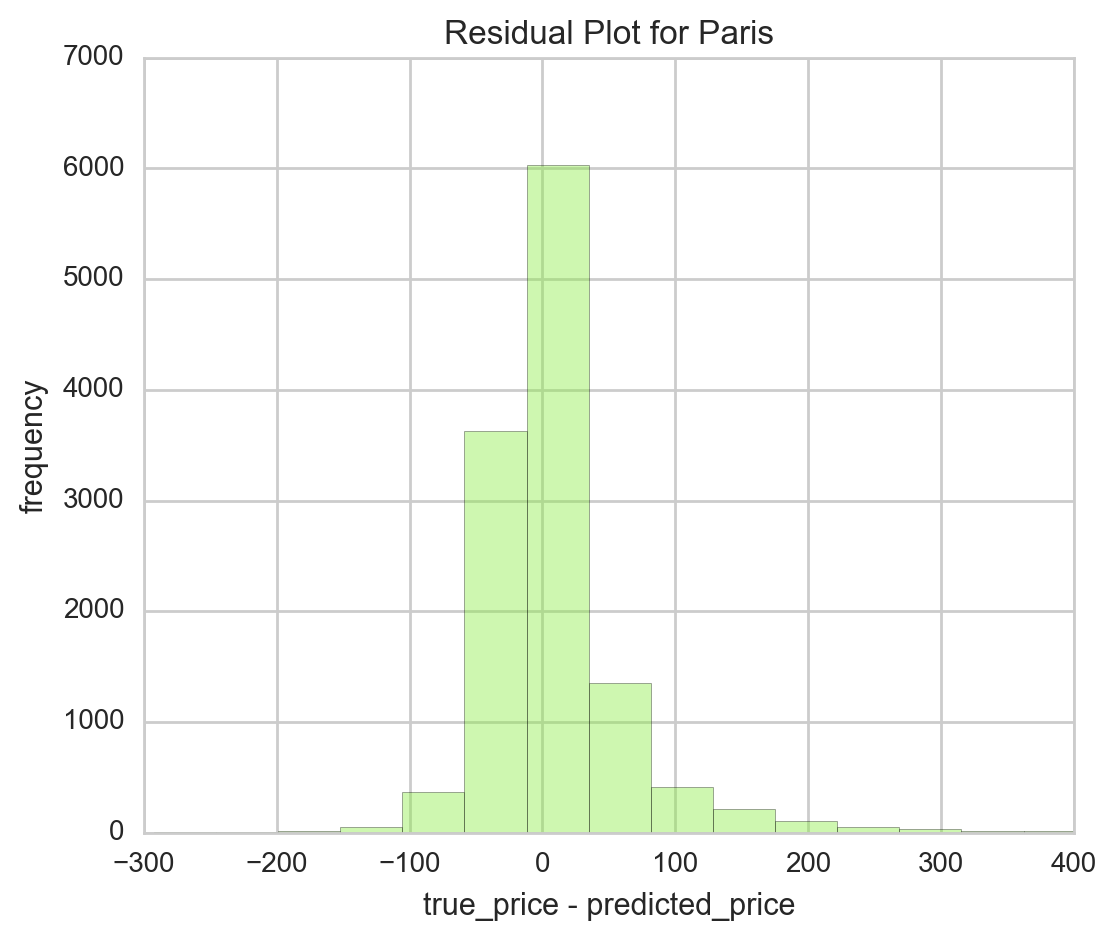

In [42]:
fig, ax = plt.subplots(figsize=(6,5))

sns.distplot(residuals, color = "#86ed3b", kde=False)

ax.set_xlabel("true_price - predicted_price")
ax.set_xlim([-300,400])

ax.set_ylabel("frequency")
#ax.set_ylim([0,200])


ax.set_title("Residual Plot for Paris")

plt.show()

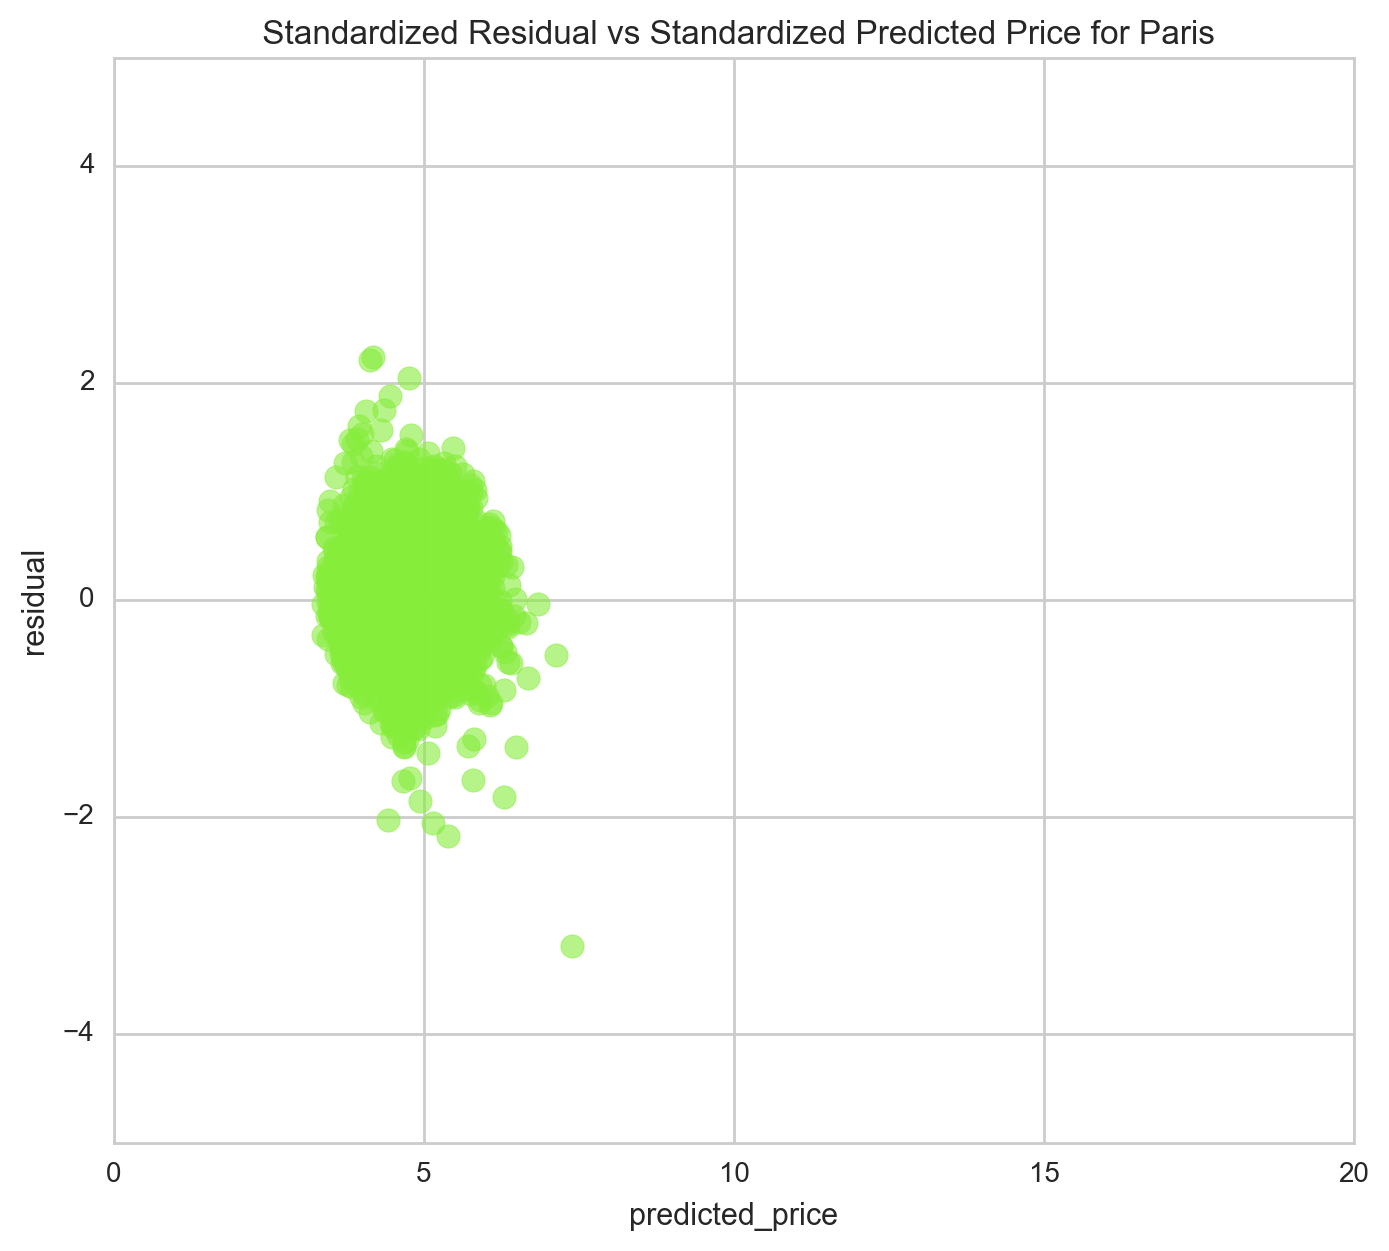

In [43]:
fig, ax = plt.subplots(figsize=(8,7))

ax.scatter(y_pred_enet, (y_test - y_pred_enet), s=70, alpha=0.6, c = "#86ed3b",
           edgecolor = "#86ed3b"

)

ax.set_xlabel("predicted_price")
ax.set_xlim([0,20])

ax.set_ylabel("residual")
ax.set_ylim([-5,5])


ax.set_title(" Standardized Residual vs Standardized Predicted Price for Paris")

plt.show()

In [44]:
y_pred_enet_all = enet_paris.fit(Xn_train, y_train).predict(Xn)


In [45]:
residuals_all = np.exp(y) - np.exp(y_pred_enet_all)

In [46]:
len(residuals_all)

41124

In [47]:
df['residuals'] = residuals_all

In [48]:
df.head(2)

,bathrooms,bedrooms,bhk,dist_arprt,host_count,latitude,longitude,metrostn_count,minstay,neighborhood,overall_satisfaction,price,rest_count,reviews,review_count,room_id,room_type,residuals
0,1.0,1.0,1.0,0.19109,478,48.888048,2.391798,6,2.0,Amerique,5.0,93.0,1,7,3682,1590108,Entire home/apt,22.011654
1,1.0,1.0,1.0,0.19109,478,48.887168,2.393196,6,2.0,Amerique,4.5,73.0,1,31,3682,599113,Entire home/apt,2.150980


In [49]:
df = df[df['residuals']<0]

In [50]:
df = df.reset_index(drop=True)

In [51]:
df.head(2)

,bathrooms,bedrooms,bhk,dist_arprt,host_count,latitude,longitude,metrostn_count,minstay,neighborhood,overall_satisfaction,price,rest_count,reviews,review_count,room_id,room_type,residuals
0,1.0,1.0,1.0,0.19109,478,48.880803,2.389111,6,7.0,Amerique,4.0,50.0,1,9,3682,911630,Entire home/apt,-21.284490
1,1.0,3.0,3.0,0.19109,478,48.878634,2.389515,6,2.0,Amerique,5.0,111.0,1,23,3682,483777,Entire home/apt,-27.725492


In [52]:
#df.to_csv(path_or_buf='/Users/jyots/Desktop/DS_Projects/airbnb_datasets/Paris_dfwithres.csv')